#**Epsilon Greedy Algorithm** for Solving Mutli-Arm Bandits


This is similar as the Greedy approach but we introduce a variable epsilon(**∊**) in the algorithm. Here we generate a random number and if the random number is greater than epsilon, then we search for the highest arm average unitl that time stamp (**Exploitation**).Else we find a new arm which could be the greedy arm (**Exploration**)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class e_Greedy:

  def __init__(self, n_arms, reward_funcs, eplison=0.1):
    self.n_arms = n_arms
    self.reward_funcs = reward_funcs
    self.eplison = eplison
    self.arm_avg = np.zeros(n_arms)
    self.arm_pick = np.zeros(n_arms) #number of times the arm has picked
    self.its = 0
    self.reward_funcs = reward_funcs

  def initialise(self):
    self.arm_avg = np.array([reward_function() for reward_function in self.reward_funcs])

  def best_arm(self):
    return np.argmax(self.arm_avg)

  def update(self, arm):
    self.its += 1
    for i in range(self.its):
      greater_arm = self.best_arm()
      reward = self.reward_funcs[greater_arm]()
      num = (self.arm_avg[greater_arm] * self.arm_pick[greater_arm] + reward)
      denom = self.arm_pick[greater_arm] + 1
      self.arm_avg[greater_arm] = num/denom #New Average = (Previous Average * Previous Picks + New Reward) / (Previous Picks + 1)
      self.arm_pick[greater_arm] += 1

  def plotter(self):
    # A function to print the plot
    rews = np.cumsum(self.rews).astype(float)
    for i in range(len(rews)):
      rews[i] = rews[i]/(i+1.0)
    plt.plot(range(1,len(rews)+1),rews)

  def get_arm_avg(self):
    return self.arm_avg

In [10]:
def create_custom_arm(n_arms, reward_funcs):
  """
    Create arms with custom reward functions.

    :param n_arms: Number of arms
    :param reward_funcs: List of custom reward functions
    :return: List of reward functions
    """
  assert len(reward_funcs) == n_arms, "Number of reward functions must match the number of arms"
  return reward_funcs

##Reward Functions

In [8]:
def bernoulli_reward(p):
    return lambda: np.random.binomial(1, p)

def normal_reward(mean, std):
    return lambda: np.random.normal(mean, std)

def exponential_reward(scale):
    return lambda: np.random.exponential(scale)

In [11]:
def run(n_arms, n_iters, n_experiments, custom_reward_funcs=None):
  cummulative_rewards = np.zeros((n_experiments, n_iters))
  best_arm_selections = np.zeros((n_experiments, n_iters))

  for experiment in range(n_experiments):
    if custom_reward_funcs:
      reward_funcs = create_custom_arm(n_arms, custom_reward_funcs)
      true_means = [np.mean([reward() for _ in range(1000)]) for reward in reward_funcs]
    else:
      reward_funcs, true_means = create_custom_arm(n_arms)

    optimal_arm = np.argmax(true_means)
    agent = e_Greedy(n_arms, reward_funcs)
    agent.initialise()

    for its in range(n_iters):
      selected_arm = agent.best_arm()
      reward = reward_funcs[selected_arm]()
      cummulative_rewards[experiment, its] = reward
      best_arm_selections[experiment, its] = int(selected_arm == optimal_arm)
      agent.update(selected_arm)

  return cummulative_rewards, best_arm_selections

##Plot

In [12]:
def plot_results(cummulative_rewards, optimal_arm_selections, n_iterations):
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(np.cumsum(np.mean(cummulative_rewards, axis = 0)))
  plt.title('Cumulative Reward')
  plt.xlabel('Iterations')
  plt.ylabel('Cumulative Reward')

  plt.subplot(1, 2, 2)
  plt.plot(np.cumsum(np.mean(optimal_arm_selections, axis = 0)) / np.arange(1, n_iterations + 1))
  plt.title('Optimal Arm Selection Rate')
  plt.xlabel('Iterations')
  plt.ylabel('Optimal Arm Selection Rate')

  plt.tight_layout()
  plt.show()

In [13]:
custom_rewards = [
    bernoulli_reward(0.7),
    normal_reward(2, 1),
    exponential_reward(1.5),
    lambda: np.random.choice([0, 1, 2, 3], p=[0.4, 0.3, 0.2, 0.1]),
    lambda: max(0, np.random.normal(5, 2))  # Truncated normal
]

In [14]:
n_arms = 5
n_iterations = 1000
n_experiments = 100

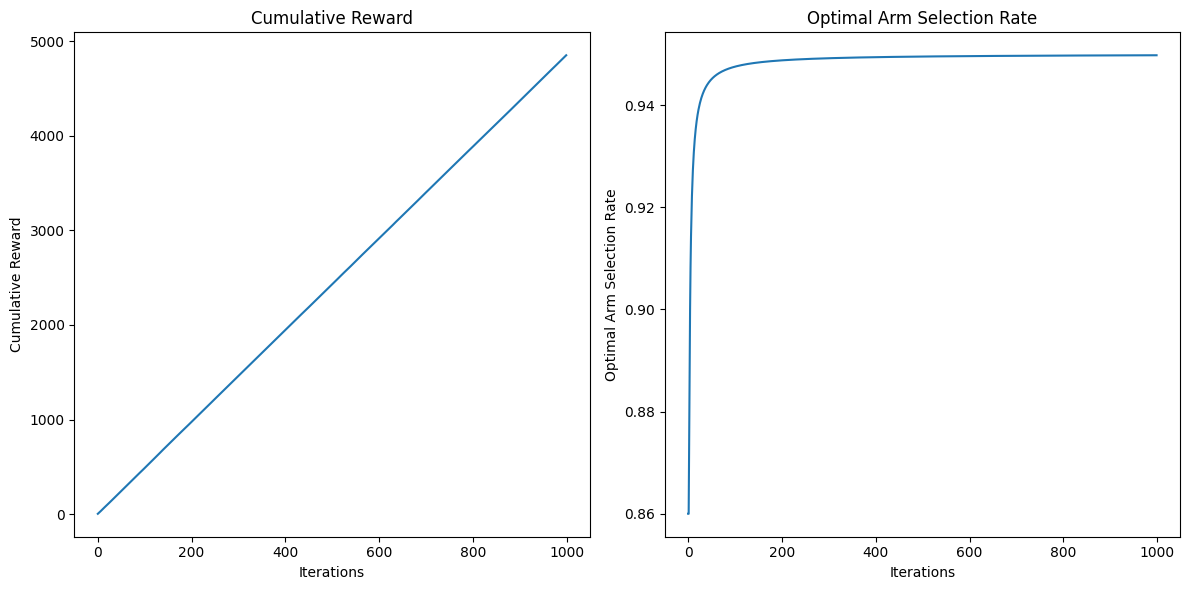

In [16]:
cumulative_rewards, optimal_arm_selections = run(n_arms, n_iterations, n_experiments, custom_rewards)
plot_results(cumulative_rewards, optimal_arm_selections, n_iterations)